# Project 2

# Used Vehicle Price Prediction

### Integrantes del Grupo:

* Jorge Enrique Gonzalez Garcia (201920233)
* Daniel Camilo Rojas Arcila (201924286)
* Julian Andrés Velasquez Osorio (201014210)
* Fernando Pérez Moreno (200222809)

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [17]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../ModeloAvanzadosDecisionTrees/dataTrain_carListings.zip')
#from google.colab import drive
#drive.mount('/content/drive')
#data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataTrain_carListings.csv")


In [18]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,0,0,0
1,21250,2016,25741,1,1,1
2,20925,2016,24633,2,2,2
3,14500,2012,84026,3,3,3
4,32488,2013,22816,4,3,4


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

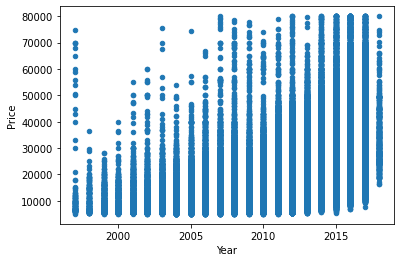

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

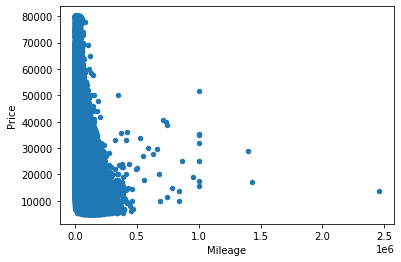

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [19]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


## Solution

### Trnasforming the Cathegorical data into numbers fro using lateri n the model

In [20]:
data['State'] = pd.factorize(data.State)[0]
data['Make'] = pd.factorize(data.Make)[0]
data['Model'] = pd.factorize(data.Model)[0]

In [10]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,0,0,0
1,21250,2016,25741,1,1,1
2,20925,2016,24633,2,2,2
3,14500,2012,84026,3,3,3
4,32488,2013,22816,4,3,4


In [21]:
# Convertimos el DataFrame en arreglos numpy.
X_Total = data.drop("Price",axis = 1).to_numpy()
Y_Total = data["Price"].to_numpy()

In [22]:
data.sample(frac=1)

,Price,Year,Mileage,State,Make,Model
115790,28488,2017,20411,13,8,17
127117,17500,2010,114144,9,1,123
183083,15195,2011,88137,15,9,68
95303,15977,2011,47684,37,9,186
70999,21988,2011,89797,24,1,13
...,...,...,...,...,...,...
363016,16432,2017,1498,20,1,32
366379,5495,2008,132904,27,1,119
211356,16197,2017,17764,5,1,32
378494,15999,2014,43262,2,4,73


In [23]:
frac = 0.1
data_sample = data.sample(frac=frac).reset_index(drop=True)
data_sample.head()

,Price,Year,Mileage,State,Make,Model
0,51894,2016,18493,36,8,201
1,17898,2016,56348,7,10,33
2,15337,2017,15089,9,4,356
3,15995,2013,54194,8,16,38
4,18995,2015,58900,22,1,111


In [24]:
data_sample.index

RangeIndex(start=0, stop=50000, step=1)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import numpy as np

#### Random Forest

In [16]:
k_fold_range = range(0,int(500000*frac),int(50000*frac))

estimator_range = range(100, 500, 100)
MSE_scores = []

for i in k_fold_range:
  data_test = data_sample.iloc[i:i+int(50000*frac)]
  data_train = data_sample[~data_sample.index.isin(data_test.index)]

  print(data_test.head())
  print(data_test.tail())

  X_train = data_train.drop("Price",axis = 1)
  Y_train = data_train["Price"]

  X_test = data_test.drop("Price",axis = 1)
  Y_test = data_test["Price"]

  for estimator in estimator_range:
        clf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        error = mean_squared_error(Y_test,y_pred)
        print(error)
        MSE_scores.append(error)

   Price  Year  Mileage  State  Make  Model
0  18388  2014    19649     19     4     18
1  12995  2013    74347     13     9    101
2  27995  2015    51649     17     3      3
3   8900  2009   104406      7     1    246
4  21980  2016    30166     24     0    369
      Price  Year  Mileage  State  Make  Model
4995  13580  2013    63726      5     2      2
4996  12991  2007    81019     13     4    106
4997  47740  2017     9747     23     6    107
4998  19995  2016    21059     25     1    121
4999  24595  2017    27808      5     4     91
18364944.28540148
18292676.708971642
18276721.630994536
18232051.40858608
      Price  Year  Mileage  State  Make  Model
5000  12998  2015    65452     22     1    135
5001   9892  2001   319398      9     4     11
5002  27831  2015    34246      6     8     12
5003  20999  2015    30766     32    10     33
5004  22928  2016    29580      8     8    139
      Price  Year  Mileage  State  Make  Model
9995  18993  2012    38256     20     1    367
9996

KeyboardInterrupt: 

In [ ]:
Modelo_1 = (MSE_scores[0]+MSE_scores[4]+MSE_scores[8]+MSE_scores[12]+MSE_scores[16]+MSE_scores[20]+MSE_scores[24]+MSE_scores[28]+MSE_scores[32]+MSE_scores[36])/10
Modelo_2 = (MSE_scores[1]+MSE_scores[5]+MSE_scores[9]+MSE_scores[13]+MSE_scores[17]+MSE_scores[21]+MSE_scores[25]+MSE_scores[29]+MSE_scores[33]+MSE_scores[37])/10
Modelo_3 = (MSE_scores[2]+MSE_scores[6]+MSE_scores[10]+MSE_scores[14]+MSE_scores[18]+MSE_scores[22]+MSE_scores[26]+MSE_scores[30]+MSE_scores[34]+MSE_scores[38])/10
Modelo_4 = (MSE_scores[3]+MSE_scores[7]+MSE_scores[11]+MSE_scores[15]+MSE_scores[19]+MSE_scores[23]+MSE_scores[27]+MSE_scores[31]+MSE_scores[35]+MSE_scores[39])/10
print("Estimators(100): " + str(Modelo_1))
print("Estimators(200): " + str(Modelo_2))
print("Estimators(300): " + str(Modelo_3))
print("Estimators(400): " + str(Modelo_4))

MSE_Finales = []

MSE_Finales.append(Modelo_1)
MSE_Finales.append(Modelo_2)
MSE_Finales.append(Modelo_3)
MSE_Finales.append(Modelo_4)

In [ ]:
plt.plot(estimator_range, MSE_Finales)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

Seleccionaremos el modelo con n_estimators = 300 ya que al revisar el MSE tiene un valor muy similar a n_estimators = 400 pero implica menores tiempos de ejecución.

In [ ]:
k_fold_range = range(0,int(500000*frac),int(50000*frac))

features_range = range(1, 6, 1)
MSE_scores = []

for i in k_fold_range:
  data_test = data_sample.iloc[i:i+int(50000*frac)]
  data_train = data_sample[~data_sample.index.isin(data_test.index)]

  X_train = data_train.drop("Price",axis = 1)
  Y_train = data_train["Price"]

  X_test = data_test.drop("Price",axis = 1)
  Y_test = data_test["Price"]

  for feature in features_range:
        clf = RandomForestRegressor(n_estimators=300,max_features=feature, random_state=1, n_jobs=-1)
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        error = mean_squared_error(Y_test,y_pred)
        print(error)
        MSE_scores.append(error)

In [ ]:
Modelo_1 = (MSE_scores[0]+MSE_scores[5]+MSE_scores[10]+MSE_scores[15]+MSE_scores[20]+MSE_scores[25]+MSE_scores[30]+MSE_scores[35]+MSE_scores[40]+MSE_scores[45])/10
Modelo_2 = (MSE_scores[1]+MSE_scores[6]+MSE_scores[11]+MSE_scores[16]+MSE_scores[21]+MSE_scores[26]+MSE_scores[31]+MSE_scores[36]+MSE_scores[41]+MSE_scores[46])/10
Modelo_3 = (MSE_scores[2]+MSE_scores[7]+MSE_scores[12]+MSE_scores[17]+MSE_scores[22]+MSE_scores[27]+MSE_scores[32]+MSE_scores[37]+MSE_scores[42]+MSE_scores[47])/10
Modelo_4 = (MSE_scores[3]+MSE_scores[8]+MSE_scores[13]+MSE_scores[18]+MSE_scores[23]+MSE_scores[28]+MSE_scores[33]+MSE_scores[38]+MSE_scores[43]+MSE_scores[48])/10
Modelo_5 = (MSE_scores[4]+MSE_scores[9]+MSE_scores[14]+MSE_scores[19]+MSE_scores[24]+MSE_scores[29]+MSE_scores[34]+MSE_scores[39]+MSE_scores[44]+MSE_scores[49])/10
print("Features(1): " + str(Modelo_1))
print("Features(2): " + str(Modelo_2))
print("Features(3): " + str(Modelo_3))
print("Features(4): " + str(Modelo_4))
print("Features(5): " + str(Modelo_5))

MSE_Finales = []

MSE_Finales.append(Modelo_1)
MSE_Finales.append(Modelo_2)
MSE_Finales.append(Modelo_3)
MSE_Finales.append(Modelo_4)
MSE_Finales.append(Modelo_5)

In [ ]:
plt.plot(features_range, MSE_Finales)
plt.xlabel('max_features')
plt.ylabel('MSE')

In [ ]:
k_fold_range = range(0,int(500000*frac),int(50000*frac))

depth_range = range(1, 21, 1)
MSE_scores = []

for i in k_fold_range:
  data_test = data_sample.iloc[i:i+int(50000*frac)]
  data_train = data_sample[~data_sample.index.isin(data_test.index)]

  X_train = data_train.drop("Price",axis = 1)
  Y_train = data_train["Price"]

  X_test = data_test.drop("Price",axis = 1)
  Y_test = data_test["Price"]
  row = []
  for depth in depth_range:
        clf = RandomForestRegressor(n_estimators=300,max_features=4,max_depth=depth, random_state=1, n_jobs=-1)
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        error = mean_squared_error(Y_test,y_pred)
        #print(error)
        row.append(error)
        #print(row)
  MSE_scores.append(row)
  print(MSE_scores)

In [ ]:
df_MSE = pd.DataFrame(MSE_scores, columns=['Modelo_1', 'Modelo_2','Modelo_3','Modelo_4','Modelo_5','Modelo_6','Modelo_7','Modelo_8','Modelo_9','Modelo_10',
                                           'Modelo_11','Modelo_12','Modelo_13','Modelo_14','Modelo_15','Modelo_16','Modelo_17','Modelo_18','Modelo_19','Modelo_20'])

df_MSE.mean(axis=0)

In [ ]:
plt.plot(depth_range, df_MSE.mean(axis=0))
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Total, Y_Total, test_size=0.70, random_state=1)

clf_VF = RandomForestRegressor(n_estimators=200, max_features=4, max_depth = 15, random_state=1, n_jobs=-1)
clf_VF.fit(X_train,y_train)
Y_Pred = clf_VF.predict(X_test) 

In [27]:
error = mean_squared_error(Y_Pred,y_test)
print("MSE :" + str(error))
print("RMSE :" + str(np.sqrt(error)))

MSE :17206022.14977094
RMSE :4148.014241751219


In [28]:
# compute feature importances
feature_cols = data.drop("Price",axis = 1).columns
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
0,Year,0.0
1,Mileage,0.0
2,State,0.0
3,Make,0.0
4,Model,0.0


# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


## Save the Model

In [31]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(clf_VF, 'price_forecast.aaaa', compress=9)

## Create the Model

In [158]:
import pandas as pd
from sklearn.externals import joblib
import sys
import os

In [159]:
Model="Mazda34dr"
Make="Mazda"
Mileage=15000
Year=2014
State="MD"

In [160]:
d = {'Model':[Model], 'Make': [Make], 'Mileage': [Mileage], 'Year': [Year], 'State': [State]}
DF = pd.DataFrame(data=d)
DF

,Model,Make,Mileage,Year,State
0,Mazda34dr,Mazda,15000,2014,MD


In [161]:
import pandas as pd
from sklearn.externals import joblib
import sys
import os


def PredictPrice(Model, Make, Mileage, Year, State):

    #clf_VF = joblib.load(os.path.dirname(__file__) + '/price_forecast.pkl') 
    
   
    d = {'Model':[Model], 'Make': [Make], 'Mileage': [Mileage], 'Year': [Year], 'State': [State]}
    DF = pd.DataFrame(data=d)
    
    # Transformado
    estados = [["MD",0],["KY",1],["SC",2],["OK",3],["TN",4],["FL",5],["NH",6],["WI",7],["NY",8],["TX",9],["NJ",10],["MI",11],
           ["AL",12],["CA",13],["NC",14],["GA",15],["OR",16],["OH",17],["AR",18],["VA",19],["WA",20],["IL",21],["AZ",22],["MA",23],
           ["CO",24],["MN",25],["KS",26],["PA",27],["MO",28],["SD",29],["IN",30],["NE",31],["UT",32],["NM",33],["HI",34],["NV",35],
           ["DE",36],["MS",37],["ID",38],["IA",39],["ME",40],["CT",41],["MT",42],["VT",43],["WV",44],["LA",45],["ND",46],["AK",47],
           ["RI",48],["WY",49],["DC",50]]

 

    marca = [["Nissan",0],["Chevrolet",1],["Hyundai",2],["Jeep",3],["Ford",4],["Kia",5],["Mercedes-Benz",6],["Dodge",7],
         ["GMC",8],["Toyota",9],["Honda",10],["Volkswagen",11],["Cadillac",12],["Volvo",13],["BMW",14],["Subaru",15],
         ["Chrysler",16],["Buick",17],["Ram",18],["Lexus",19],["Porsche",20],["Audi",21],["Lincoln",22],["MINI",23],
         ["INFINITI",24],["Scion",25],["Land",26],["Acura",27],["Mazda",28],["Mercury",29],["Mitsubishi",30],
         ["Pontiac",31],["Jaguar",32],["Bentley",33],["Suzuki",34],["FIAT",35],["Tesla",36],["Freightliner",37]]

 

    df_estados = pd.DataFrame(estados, columns = ["State","State_2"])
    df_marca = pd.DataFrame(marca, columns = ["Make","Make_2"])
    df_modelos = pd.read_csv(r'../ModeloAvanzadosDecisionTrees/Modelos.csv')

 

    DF['State'] = DF['State'].str.strip()

 

    DF = pd.merge(DF,df_marca, how = "left", left_on = "Make",right_on = "Make")
    DF = pd.merge(DF,df_estados, how = "left", left_on = "State",right_on = "State")
    DF = pd.merge(DF,df_modelos, how = "left", left_on = "Model",right_on = "Model")
    DF = DF.drop(["Make","State", "Model"],axis=1)
    DF = DF.rename(columns = {"Make_2": "Make",
                                     "State_2": "State","Model_2": "Model" 
                                     })
  
    # Create features
    #DF['State'] = pd.factorize(DF.State)[0]
    #DF['Make'] = pd.factorize(DF.Make)[0]
    #DF['Model'] = pd.factorize(DF.Model)[0]
  
    

    # Make prediction
    p1 = clf_VF.predict(DF)

    return p1


#if __name__ == "__main__":
    
    #if len(sys.argv) == 1:
        #print('Please add an URL')
        
    #else:

        #DF = sys.argv[1]
        

print(DF)
print('forecast of price: ', p1)
 

       Model   Make  Mileage  Year State
0  Mazda34dr  Mazda    15000  2014    MD
forecast of price:  [30952.53446927]


In [148]:
#p1 = PredictPrice(Model, Make, Mileage, Year, State)

       Model   Make  Mileage  Year State
0  Mazda34dr  Mazda    15000  2014    MD
forecast of price:  [30952.53446927]


## Part 2: Model in batch

In [167]:
# Aqui no es necesario porque la función PredictPrice está en este mismo notebook.Para correr de AWS si se debe redefinir
from ModelDeployment1 import PredictPrice

### Part 3: Create the API

In [162]:
from flask import Flask
from flask_restx import Api, Resource, fields
from sklearn.externals import joblib

In [129]:
DF

,Model,Make,Mileage,Year,State
0,Mazda6,Mazda,15000,2014,MD


Create api

In [163]:
from flask import Flask
from flask_restx import Api, Resource, fields
from sklearn.externals import joblib

app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Predicting Price',
    description='Predicting Price')

ns = api.namespace('predict', 
     description='Predicting Price')
   
parser = api.parser()

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='type Model', 
    location='args')

parser.add_argument(
    'Make', 
    type=str, 
    required=True, 
    help='Type make', 
    location='args')

parser.add_argument(
    'Mileage', 
    type=int, 
    required=True, 
    help='Type mileage', 
    location='args')

parser.add_argument(
    'Year', 
    type=int, 
    required=True, 
    help='Type year', 
    location='args')


parser.add_argument(
    'State', 
    type=str, 
    required=True, 
    help='type State', 
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.String,
})

Load model and create function that predicts an URL

In [ ]:
#from model_deployment.m09_model_deployment import PredictPrice

In [164]:
@ns.route('/')
class PredictingPrice(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        Model = args['Model']
        Make = args['Make']
        Mileage = args['Mileage']
        Year = args['Year']
        State = args['State']
        
        #DF = DF.split('%3B')
        print(DF)
        
        return {
         "result": PredictPrice(Model, Make, Mileage, Year, State)
        }, 200

In [152]:
DF.Model

0    Mazda34dr
Name: Model, dtype: object

In [165]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jun/2020 18:48:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 18:48:37] "GET /swagger.json HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 18:48:37] "GET /swaggerui/favicon-32x32.png HTTP/1.1" 200 -
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:154: UserWarning: Loky-backed parallel loops cannot be nested below threads, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
127.0.0.1 - - [29/Jun/2020 18:49:42] "GET /predict/?Model=Mazda34dr&Make=Mazda&Mileage=16000&Year=2016&State=MD HTTP/1.1" 200 -


       Model   Make  Mileage  Year State
0  Mazda34dr  Mazda    15000  2014    MD
